In [223]:
import pandas as pd
import plotly.express as px


In [224]:
df = pd.read_csv("performance_results.csv")

In [225]:
df["Capture time [s]"] = df["Capture time [s]"].str.replace("s", "").astype(float)
df["fps"] = df["Frames"] / df["Capture time [s]"]

df[["scene", "api", "brdf", "workload"]] = df["Config"].str.split(pat="_", expand=True)
df["config"] = df["scene"] + "_" + df["api"] + "_" + df["brdf"]
df["R/W [MB/frame]"] = df["Read [MB/frame]"] + df["Write [MB/frame]"]
df = df.drop(columns=["Config", "Read [MB/s]", "Write [MB/s]"])

# Filter out bad data
bad_samples = df[df["Comment"] == "bad sample"].index
df = df.drop(bad_samples, inplace=False).reset_index()
bad_samples = df[(df["config"] == "lucy_vk_ue4") & (df["workload"] == "10x") & (df["Cycles/ 10 frames [Prefix-Cycles]"] < 200)].index
df = df.drop(bad_samples, inplace=False).reset_index()
df


,level_0,index,Frames,Workload,Frame time [ms],Cycles/ 10 frames [Prefix-Cycles],Prefix,Read [MB/frame],Write [MB/frame],Capture time [s],Comment,fps,scene,api,brdf,workload,config,R/W [MB/frame]
0,0,0,10,100,0.110,1.10,G,986.8946,699.1977,1.133,NaN,8.826125,lucy,gles,filament,100x,lucy_gles_filament,1686.0923
1,1,1,10,100,0.110,1.09,G,975.0858,696.3781,1.125,NaN,8.888889,lucy,gles,filament,100x,lucy_gles_filament,1671.4639
2,2,2,10,100,0.110,1.05,G,936.7387,663.0815,1.081,NaN,9.250694,lucy,gles,filament,100x,lucy_gles_filament,1599.8202
3,3,3,10,100,0.112,1.08,G,978.8894,693.6953,1.114,NaN,8.976661,lucy,gles,ue4,100x,lucy_gles_ue4,1672.5847
4,4,4,10,100,0.110,1.09,G,979.3715,685.1376,1.123,NaN,8.904720,lucy,gles,ue4,100x,lucy_gles_ue4,1664.5091
5,5,5,10,100,0.110,1.11,G,986.6720,698.9907,1.138,NaN,8.787346,lucy,gles,ue4,100x,lucy_gles_ue4,1685.6627
6,6,6,10,100,0.202,1.88,G,1624.8336,1541.5936,2.324,NaN,4.302926,lucy,vk,filament,100x,lucy_vk_filament,3166.4272
7,7,7,10,100,0.240,1.88,G,1624.8757,1542.3740,2.412,NaN,4.145937,lucy,vk,filament,100x,lucy_vk_filament,3167.2497
8,8,8,10,100,0.245,1.92,G,1739.5638,1690.1060,2.473,NaN,4.043672,lucy,vk,filament,100x,lucy_vk_filament,3429.6698
9,9,9,10,100,0.240,1.89,G,1744.9957,1753.1307,2.369,NaN,4.221190,lucy,vk,ue4,100x,lucy_vk_ue4,3498.1264


In [226]:
### Frame-rate
df_10x = df.pivot_table(
    index = ["api", "brdf", "scene", "config"],
    values = "fps",
    columns="workload",
    aggfunc="max"
)

print(df_10x)


df_fastest_10x = df_10x["10x"].reset_index()
df_fastest_10x = df_fastest_10x.rename(columns={"10x": "fps"})
df_fastest_10x["fps_norm"] = (df_fastest_10x["fps"]-df_fastest_10x["fps"].min())/(df_fastest_10x["fps"].max()-df_fastest_10x["fps"].min())
df_fastest_10x

workload                                         100x        10x
api  brdf     scene   config                                    
gles filament lucy    lucy_gles_filament     9.250694  76.335878
              suzanne suzanne_gles_filament  9.276438  84.745763
     ue4      lucy    lucy_gles_ue4          8.976661  76.335878
              suzanne suzanne_gles_ue4       9.699321  79.365079
vk   filament lucy    lucy_vk_filament       4.302926  37.453184
              suzanne suzanne_vk_filament    4.593477  35.087719
     ue4      lucy    lucy_vk_ue4            4.585053  36.231884
              suzanne suzanne_vk_ue4         4.606172  35.211268


,api,brdf,scene,config,fps,fps_norm
0,gles,filament,lucy,lucy_gles_filament,76.335878,0.830644
1,gles,filament,suzanne,suzanne_gles_filament,84.745763,1.000000
2,gles,ue4,lucy,lucy_gles_ue4,76.335878,0.830644
3,gles,ue4,suzanne,suzanne_gles_ue4,79.365079,0.891645
4,vk,filament,lucy,lucy_vk_filament,37.453184,0.047635
5,vk,filament,suzanne,suzanne_vk_filament,35.087719,0.000000
6,vk,ue4,lucy,lucy_vk_ue4,36.231884,0.023041
7,vk,ue4,suzanne,suzanne_vk_ue4,35.211268,0.002488


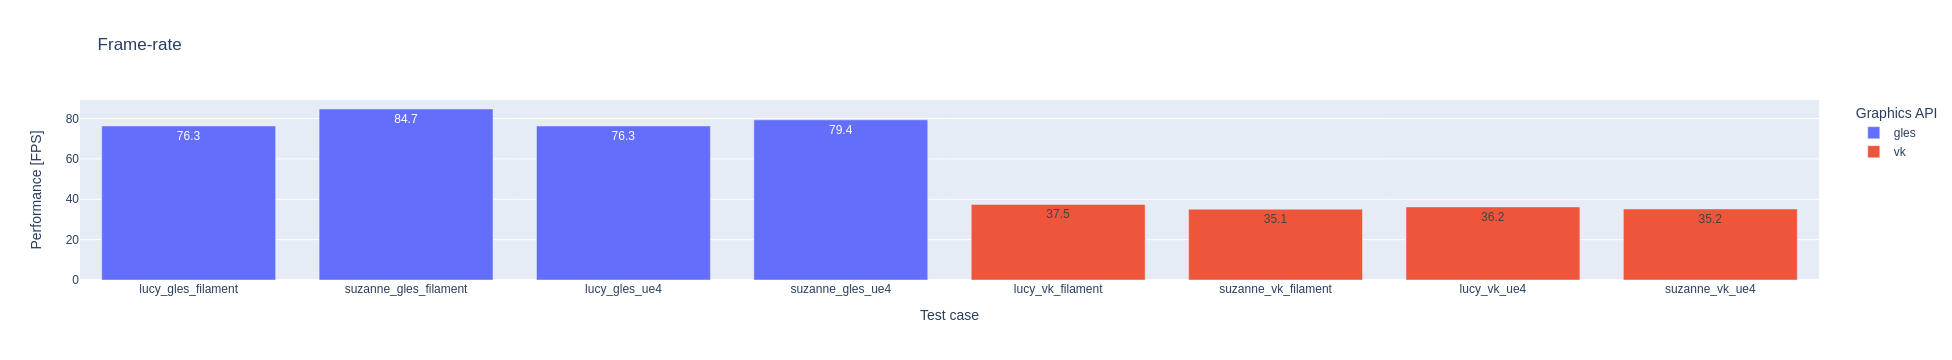

In [273]:
fig = px.bar(df_fastest_10x, x = "config" , y = "fps", color = "api", text_auto=".3s",
            title="Frame-rate",
            labels = {
                "fps": "Performance [FPS]",
                "api": "Graphics API",
                "config": "Test case", 
            },
)
fig

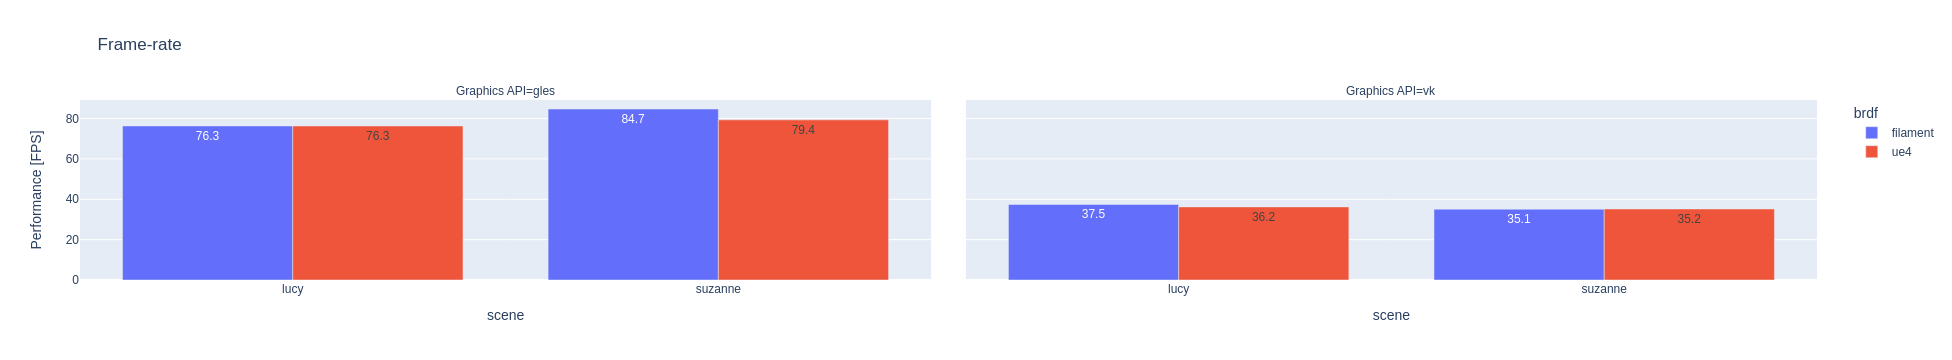

In [262]:
fig = px.bar(df_fastest_10x, x = "scene" , y = "fps", color = "brdf", barmode="group", facet_col="api", text_auto=".3s",
            title="Frame-rate",
            labels = {
                "fps": "Performance [FPS]",
                "api": "Graphics API",
                "config": "Test case", 
            },
)
fig

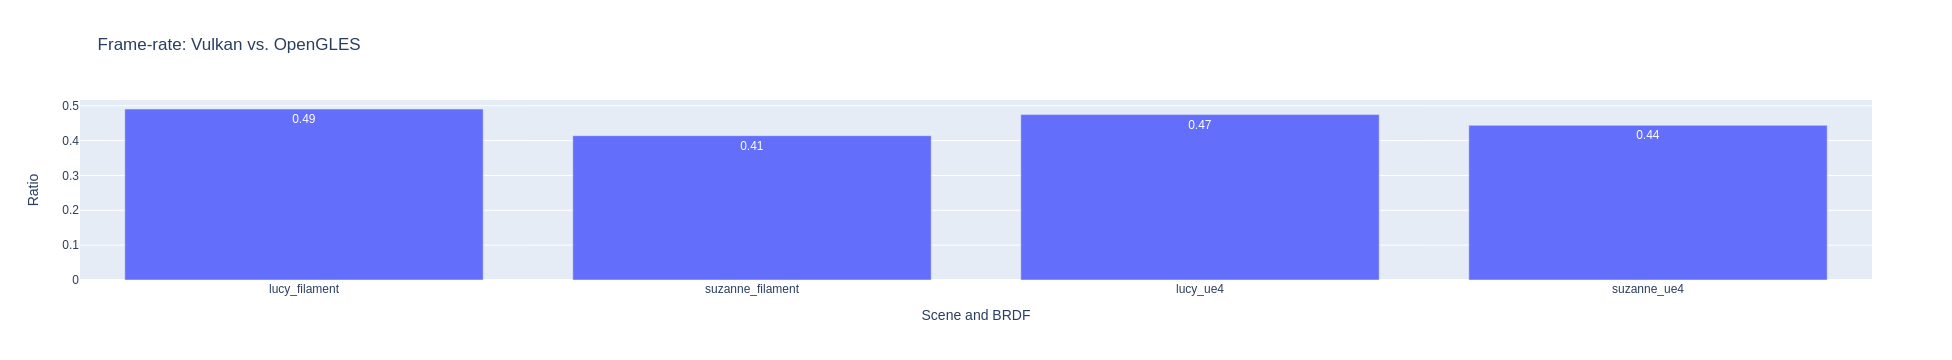

In [274]:
### Frame-rate versus API
df_perf_vs = df_fastest_10x.pivot_table(
    index = ["brdf", "scene"],
    columns = "api",
    values = "fps"
)

df_perf_vs["vk_vs_gles"] = df_perf_vs["vk"] / df_perf_vs["gles"]
df_perf_vs = df_perf_vs["vk_vs_gles"].reset_index()
df_perf_vs["name"] = df_perf_vs["scene"] + "_" + df_perf_vs["brdf"]

fig = px.bar(df_perf_vs, x = "name", y = "vk_vs_gles", text_auto=".2",
            title="Frame-rate: Vulkan vs. OpenGLES",
            labels = {
                "vk_vs_gles": "Ratio",
                "name": "Scene and BRDF",
            },
            )
fig

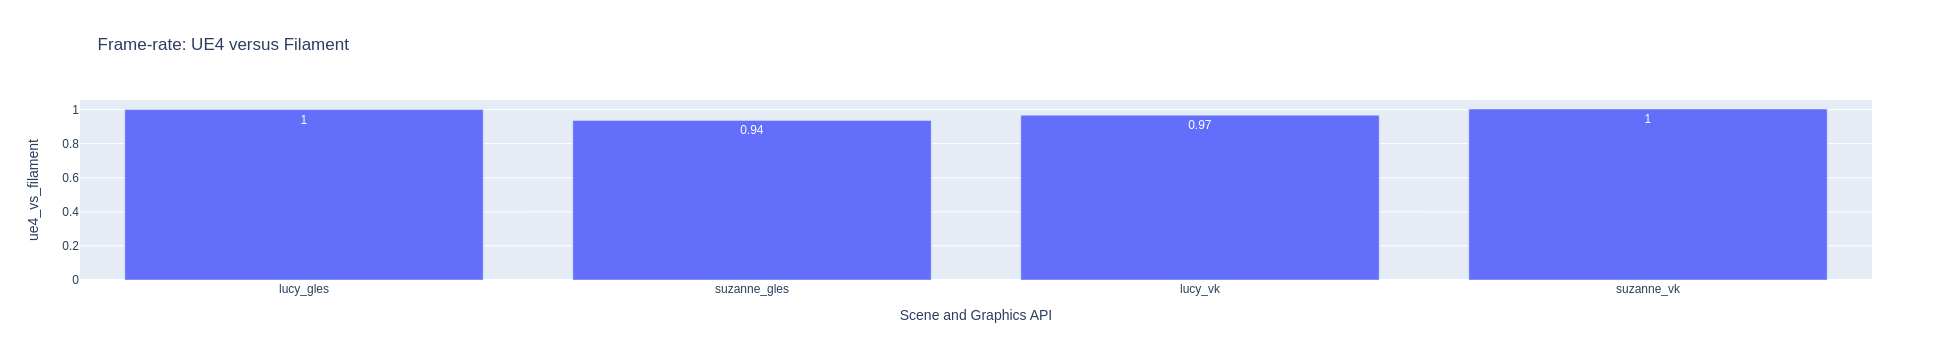

In [266]:
### Frame-rate versus BRDF
df_perf_vs = df_fastest_10x.pivot_table(
    index = ["api", "scene"],
    columns = "brdf",
    values = "fps"
)

df_perf_vs["ue4_vs_filament"] = df_perf_vs["ue4"] / df_perf_vs["filament"]
df_perf_vs = df_perf_vs["ue4_vs_filament"].reset_index()
df_perf_vs["name"] = df_perf_vs["scene"] + "_" + df_perf_vs["api"]

fig = px.bar(df_perf_vs, x = "name", y = "ue4_vs_filament", barmode="group", text_auto=".2",
            title="Frame-rate: UE4 versus Filament",
            labels = {
                "vk_vs_gles": "Ratio",
                "name": "Scene and Graphics API",
            },
)
fig

In [265]:
### Bandwidth

df_bw_10x = df.pivot_table(
    index = ["api", "brdf", "scene", "config"],
    values = "R/W [MB/frame]",
    columns="workload",
    aggfunc="min"
)

df_bw_10x = df_bw_10x["10x"].reset_index()
df_bw_10x = df_bw_10x.rename(columns={"10x": "bandwidth [MB/frame]"})
df_bw_10x["bw_norm"] = (df_bw_10x["bandwidth [MB/frame]"]-df_bw_10x["bandwidth [MB/frame]"].min())/(df_bw_10x["bandwidth [MB/frame]"].max()-df_bw_10x["bandwidth [MB/frame]"].min())
df_bw_10x

,api,brdf,scene,config,bandwidth [MB/frame],bw_norm
0,gles,filament,lucy,lucy_gles_filament,172.8009,0.034569
1,gles,filament,suzanne,suzanne_gles_filament,166.0653,0.000000
2,gles,ue4,lucy,lucy_gles_ue4,170.6037,0.023292
3,gles,ue4,suzanne,suzanne_gles_ue4,174.2990,0.042258
4,vk,filament,lucy,lucy_vk_filament,350.5456,0.946802
5,vk,filament,suzanne,suzanne_vk_filament,360.4074,0.997415
6,vk,ue4,lucy,lucy_vk_ue4,352.7431,0.958080
7,vk,ue4,suzanne,suzanne_vk_ue4,360.9110,1.000000


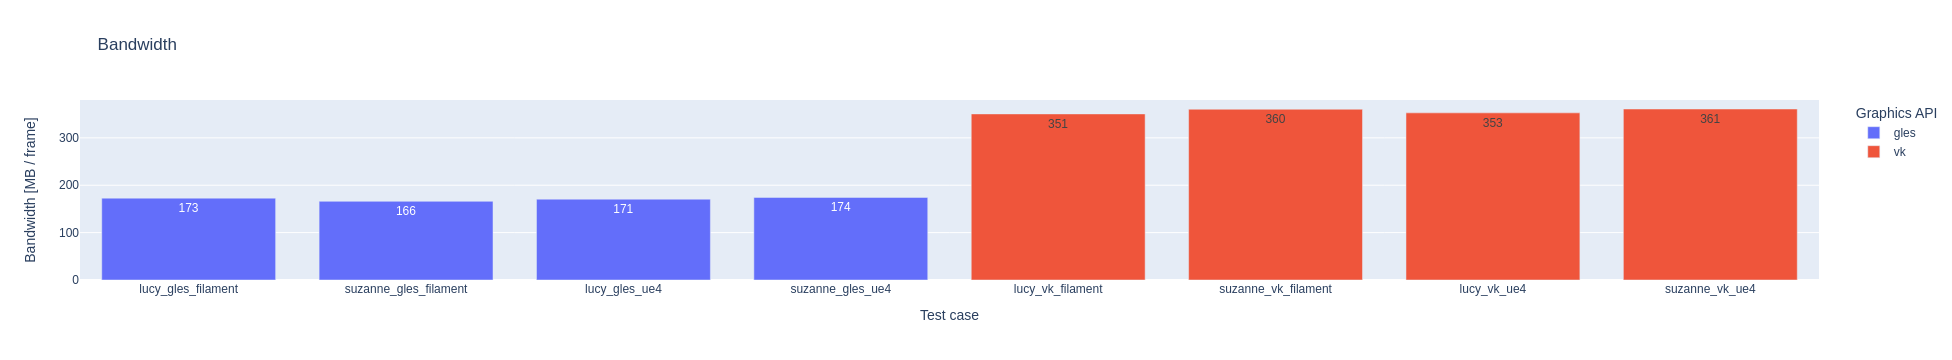

In [275]:
fig = px.bar(df_bw_10x, x = "config" , y = "bandwidth [MB/frame]", color = "api", text_auto=".3s",
             title="Bandwidth",
            labels = {
                "bandwidth [MB/frame]": "Bandwidth [MB / frame]",
                "config": "Test case",
                "api": "Graphics API",
            },
            )
fig

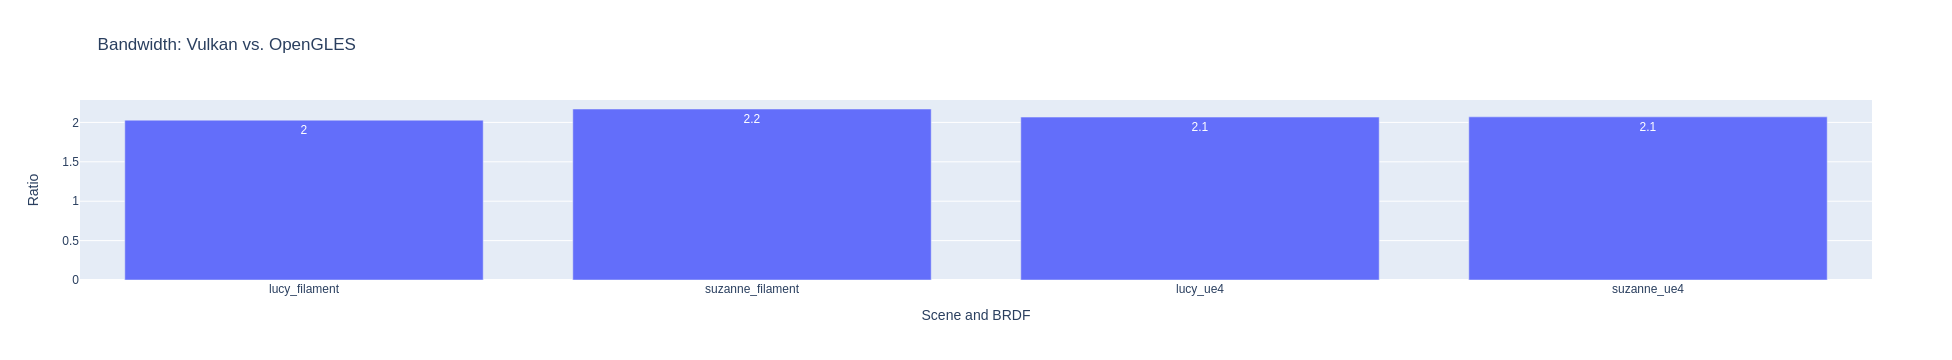

In [276]:
### Bandwidth versus API

df_bw_vs = df_bw_10x.pivot_table(
    index = ["brdf", "scene"],
    columns = "api",
    values = "bandwidth [MB/frame]"
)

df_bw_vs["vk_vs_gles"] = df_bw_vs["vk"] / df_bw_vs["gles"]
df_bw_vs = df_bw_vs["vk_vs_gles"].reset_index()
df_bw_vs["name"] = df_bw_vs["scene"] + "_" + df_bw_vs["brdf"]

fig = px.bar(df_bw_vs, x = "name", y = "vk_vs_gles", text_auto=".2",
            title="Bandwidth: Vulkan vs. OpenGLES",
            labels = {
                "bandwidth [MB/frame]": "Bandwidth [MB / frame]",
                "name": "Scene and BRDF",
                "vk_vs_gles": "Ratio",
            },
)
fig

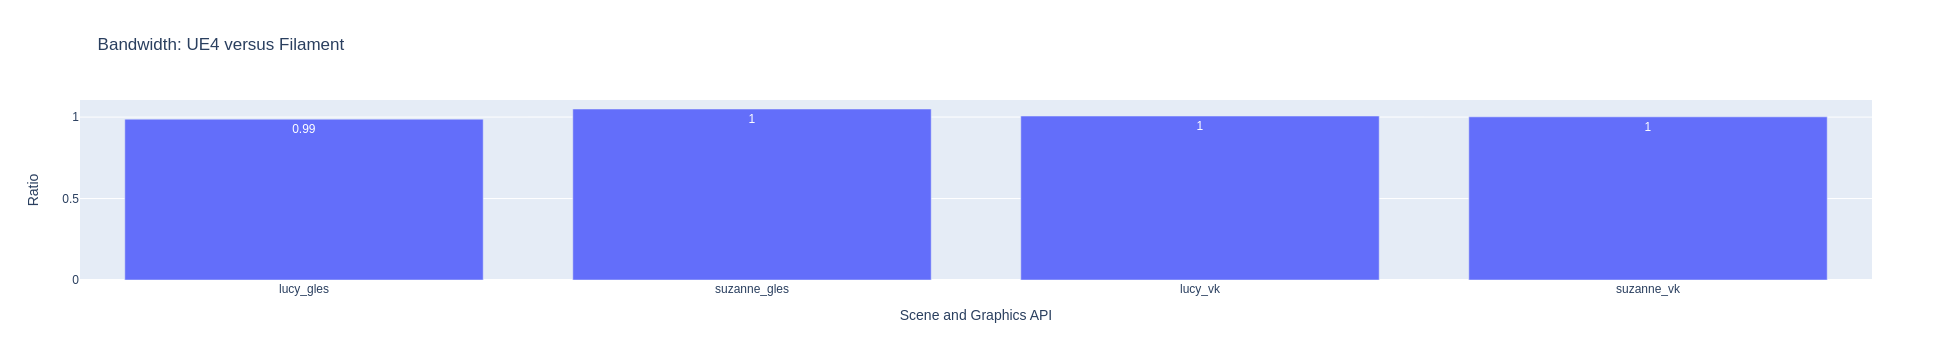

In [269]:
### Bandwidth versus BRDF
df_bw_vs = df_bw_10x.pivot_table(
    index = ["api", "scene"],
    columns = "brdf",
    values = "bandwidth [MB/frame]"
)

df_bw_vs["ue4_vs_filament"] = df_bw_vs["ue4"] / df_bw_vs["filament"]
df_bw_vs = df_bw_vs["ue4_vs_filament"].reset_index()
df_bw_vs["name"] = df_bw_vs["scene"] + "_" + df_bw_vs["api"]

fig = px.bar(df_bw_vs, x = "name", y = "ue4_vs_filament", barmode="group", text_auto=".2",
            title="Bandwidth: UE4 versus Filament",
            labels = {
                "bandwidth [MB/frame]": "Bandwidth [MB / frame]",
                "name": "Scene and Graphics API",
                "ue4_vs_filament": "Ratio",
            },
            )
fig

In [232]:
### Cycles

df_cycles_10x = df.pivot_table(
    index = ["api", "brdf", "scene", "config"],
    values = "Cycles/ 10 frames [Prefix-Cycles]",
    columns="workload",
    aggfunc="min"
)

df_cycles_10x = df_cycles_10x["10x"].reset_index()
df_cycles_10x = df_cycles_10x.rename(columns={"10x": "Cycles [MCycles / 10frames]"})
df_cycles_10x["MCycles / frame"] = df_cycles_10x["Cycles [MCycles / 10frames]"] / 10
df_cycles_10x

,api,brdf,scene,config,Cycles [MCycles / 10frames],MCycles / frame
0,gles,filament,lucy,lucy_gles_filament,128.0,12.8
1,gles,filament,suzanne,suzanne_gles_filament,115.0,11.5
2,gles,ue4,lucy,lucy_gles_ue4,128.0,12.8
3,gles,ue4,suzanne,suzanne_gles_ue4,123.0,12.3
4,vk,filament,lucy,lucy_vk_filament,202.0,20.2
5,vk,filament,suzanne,suzanne_vk_filament,213.0,21.3
6,vk,ue4,lucy,lucy_vk_ue4,207.0,20.7
7,vk,ue4,suzanne,suzanne_vk_ue4,219.0,21.9


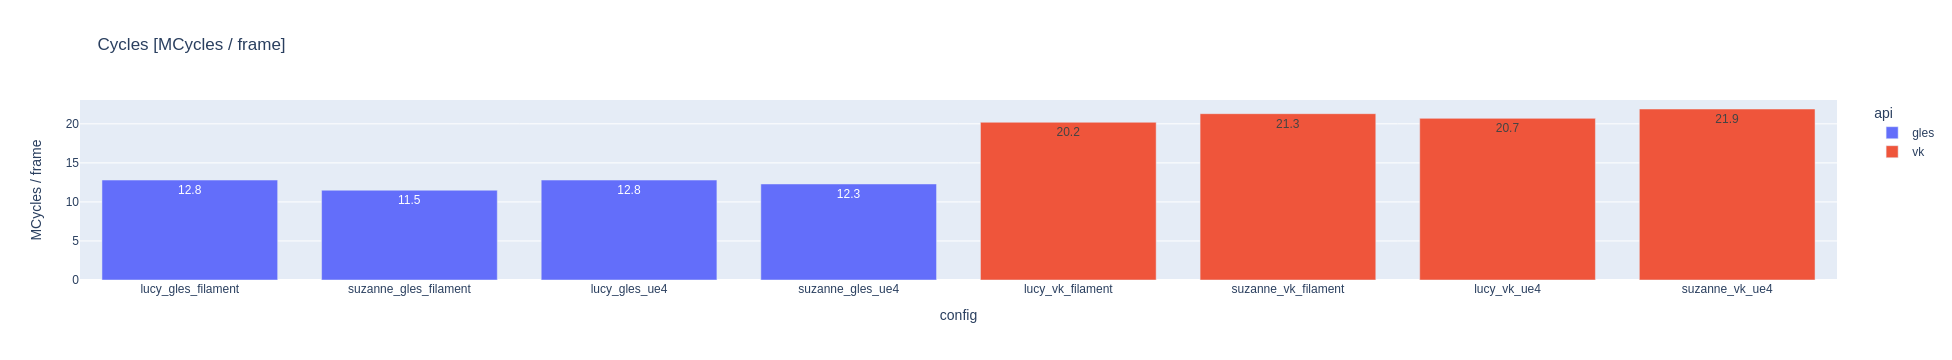

In [233]:
fig = px.bar(df_cycles_10x, x = "config", y = "MCycles / frame", color = "api", text_auto=".3s",
             title="Cycles [MCycles / frame]"
            )
fig

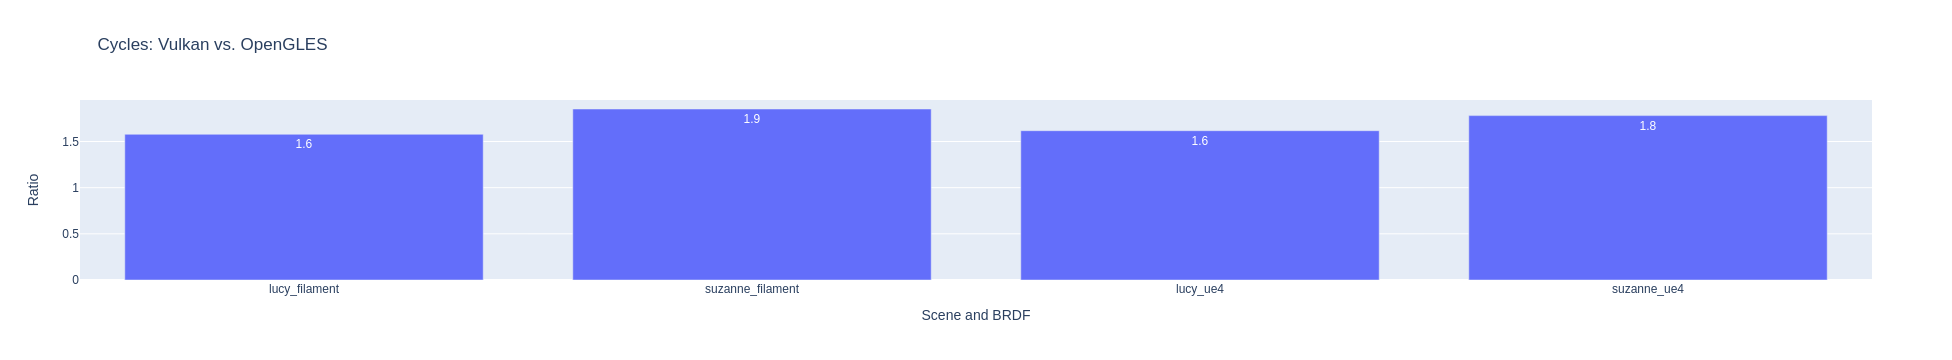

In [277]:
### Cycles versus API

df_cycles_vs = df_cycles_10x.pivot_table(
    index = ["brdf", "scene"],
    columns = "api",
    values = "MCycles / frame"
)

df_cycles_vs["vk_vs_gles"] = df_cycles_vs["vk"] / df_cycles_vs["gles"]
df_cycles_vs = df_cycles_vs["vk_vs_gles"].reset_index()
df_cycles_vs["name"] = df_cycles_vs["scene"] + "_" + df_cycles_vs["brdf"]

fig = px.bar(df_cycles_vs, x = "name", y = "vk_vs_gles", text_auto=".2",
            title="Cycles: Vulkan vs. OpenGLES",
            labels = {
                "bandwidth [MB/frame]": "Bandwidth [MB / frame]",
                "name": "Scene and BRDF",
                "vk_vs_gles": "Ratio",
            },
            )
fig

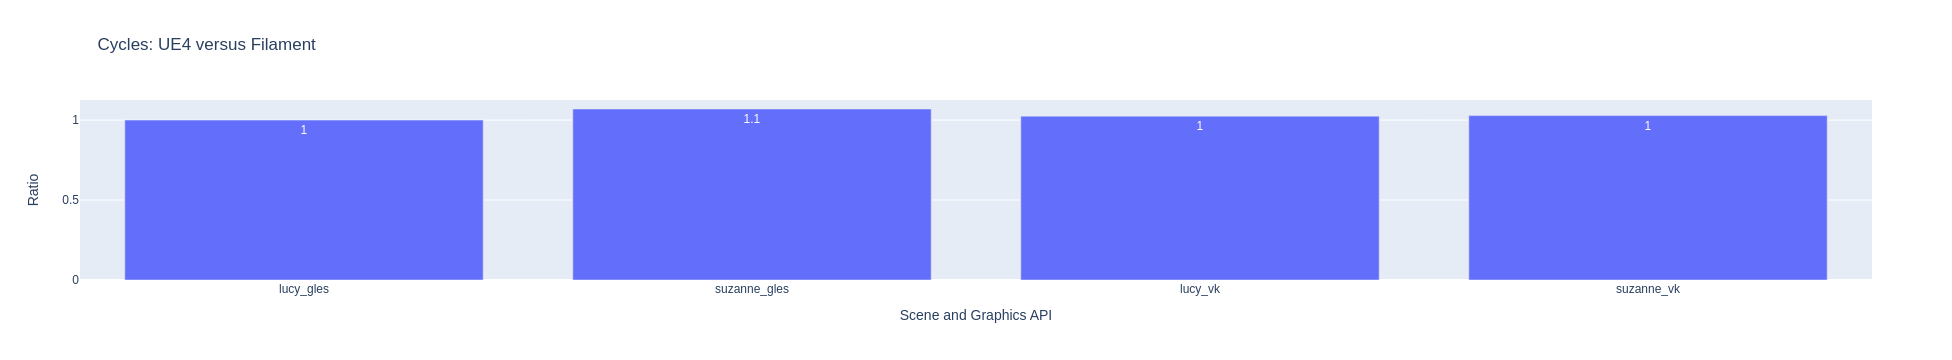

In [278]:
### Cycles versus BRDF
df_cycles_vs = df_cycles_10x.pivot_table(
    index = ["api", "scene"],
    columns = "brdf",
    values = "MCycles / frame"
)

df_cycles_vs["ue4_vs_filament"] = df_cycles_vs["ue4"] / df_cycles_vs["filament"]
df_cycles_vs = df_cycles_vs["ue4_vs_filament"].reset_index()
df_cycles_vs["name"] = df_cycles_vs["scene"] + "_" + df_cycles_vs["api"]

fig = px.bar(df_cycles_vs, x = "name", y = "ue4_vs_filament", text_auto=".2",
            title="Cycles: UE4 versus Filament",
            labels = {
                "bandwidth [MB/frame]": "Bandwidth [MB / frame]",
                "name": "Scene and Graphics API",
                "ue4_vs_filament": "Ratio",
            },
)
fig